## Keras:
a very high-level package for creating neural networs. As of 2017 or so, it has been integrated into Tensorflow (whereas before, it sttod on to of either a Theno, Tensorflow, or CNTK backend -- these three packages are lower -level tools that can be used for building neural networks).

Keras is great because it lets you spin up all popular network architectures in an almost criminally few lines of code, for instance, le'ts build a 10-way classifier that can classify hand-writen numbers from 0-9.

You can create NN architecture schematics here: [Link](https://alexlenail.me/NN-SVG/index.html)

In [4]:
# packages/ functions that we will need
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
# import the function directly from keras itself
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.initializers import RandomUniform, Zeros, Ones, glorot_uniform
from keras.regularizers import l1,l2

In [7]:
# load and transform the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_train = x_train.astype('float32')
# x_train = x_train/1.
x_train_subset = x_train[:6000,:]

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
x_test = x_test.astype('float32')
# x_test x_test /1.
x_test_subset = x_test[:1000,:]

y_train = to_categorical(y_train)
y_train_subset = y_train[:6000]

y_test = to_categorical(y_test)
y_test_subset = y_test[:1000]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

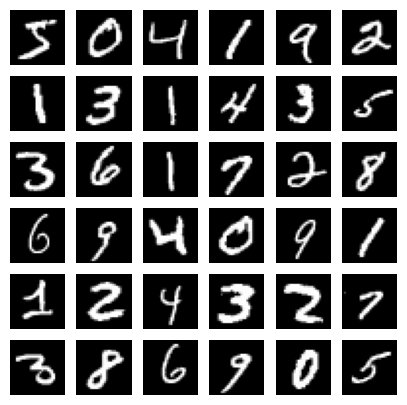

In [14]:
# visualize sample images from input dataset
figsize(5, 5)
for x in range(0, 36):
    plt.subplot(6, 6, x+1)
    plt.imshow(x_train[x].reshape(28,28), cmap='gray')
    # plt.imshow(np.reshape(x_train[x,:],(28,28)),cmap='gray')

    plt.axis('off')

In [15]:
def makeNN(): # a function we can call to build our model
    myNN = Sequential() # instantiate a model
    myNN.add(Dense(64,activation='relu',   kernel_initializer='random_uniform', input_shape=(x_train.shape[1],)))
    myNN.add(Dense(32,activation='relu',   kernel_initializer='random_uniform'))
    myNN.add(Dense(10,activation='sigmoid',kernel_initializer='random_uniform'))
    myNN.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'],optimizer='SGD')
    return myNN

In [16]:
# make our model
myNN = makeNN()

# train our model
history = myNN.fit(x=x_train_subset,y=y_train_subset,batch_size=1024,epochs=10,validation_data=(x_test_subset,y_test_subset))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - categorical_accuracy: 0.1897 - loss: 2.5474 - val_categorical_accuracy: 0.4390 - val_loss: 1.7169
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - categorical_accuracy: 0.5234 - loss: 1.4792 - val_categorical_accuracy: 0.3690 - val_loss: 1.9002
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.5185 - loss: 1.4281 - val_categorical_accuracy: 0.6640 - val_loss: 0.9915
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.6921 - loss: 0.9083 - val_categorical_accuracy: 0.7180 - val_loss: 0.8615
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.7691 - loss: 0.7107 - val_categorical_accuracy: 0.7580 - val_loss: 0.7301
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.7899 - loss: 0.6169 - val_categorical_accuracy: 0.7870 - val_loss: 0.6567
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.8315 - loss: 0.5220 - val_categ

<Axes: >

Text(0.5, 1.0, 'Loss per epoch')

Text(0.5, 0, 'Training epoch')

Text(0, 0.5, 'categorical crossentropy loss')

<Axes: >

Text(0.5, 1.0, '10-way classification accuracy per epoch')

Text(0.5, 0, 'Training epoch')

Text(0, 0.5, 'categorical accuracy')

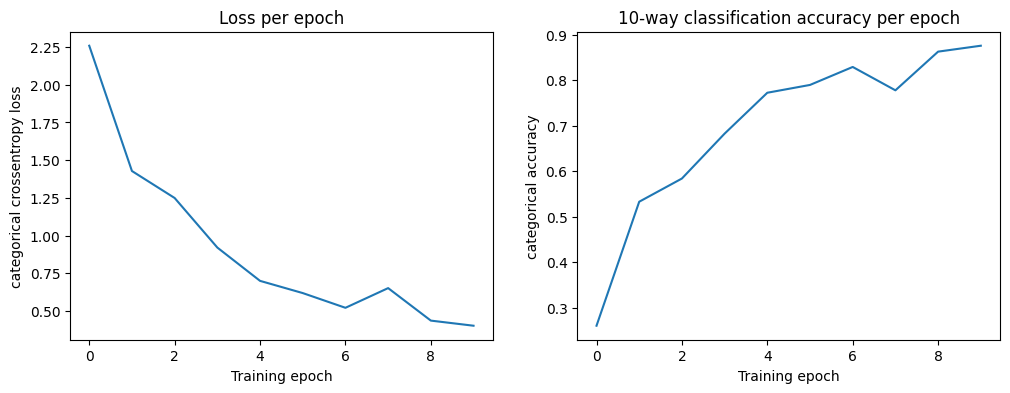

In [17]:
figsize(12,4)
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('Loss per epoch')
plt.xlabel('Training epoch')
plt.ylabel('categorical crossentropy loss')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'])
plt.title('10-way classification accuracy per epoch')
plt.xlabel('Training epoch')
plt.ylabel('categorical accuracy')

...and also visualize the model's decision boundary in 2D for any two given classes (i.e. numbers, like 1 vs 8)

577/577 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


Text(0.5, 1.0, 'red: 1, blue: 8     heatmap: P(digit = 8)')

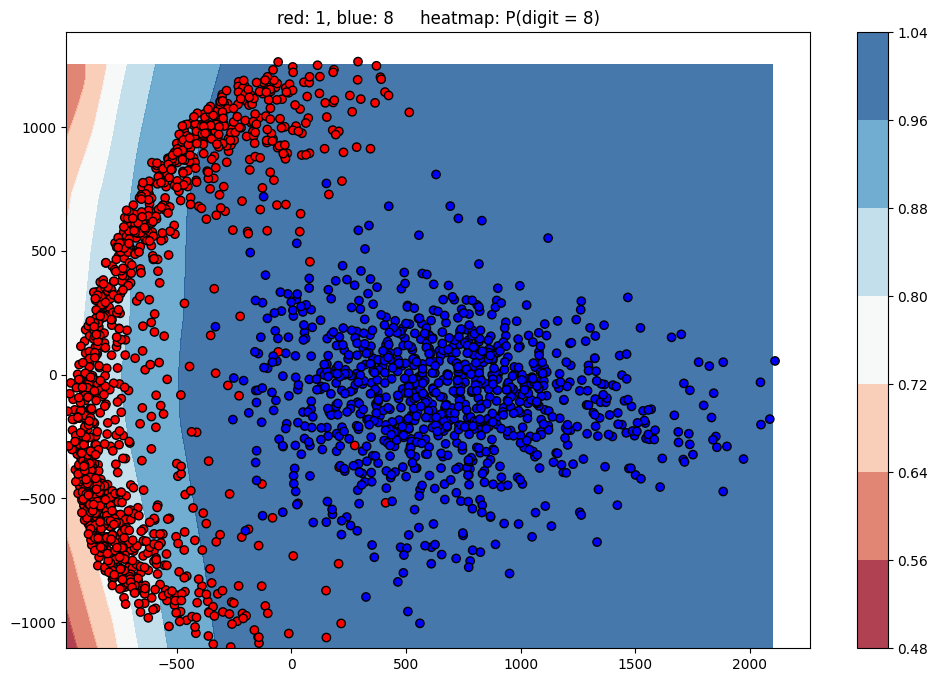

In [18]:
# visualize the decision boundary
# decision boundary visualization borrowed from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#############################################
# specify numbers to visualize
digitA = 1
digitB = 8
#############################################
figsize(12, 8)

# get test set data and labels from only these two numbers
x_test_2dig = np.c_[x_test[y_test[:,digitA].astype(bool),:].T,x_test[y_test[:,digitB].astype(bool),:].T].T
dig1_y = np.sum(y_test[:,digitA]==1)
dig2_y = np.sum(y_test[:,digitB]==1)
y_test_2dig = np.c_[np.zeros((1,dig1_y)),np.ones((1,dig2_y))]

# PCA-project into 2D
pca = PCA(n_components=2)
Xtransformed = pca.fit_transform(x_test_2dig)

# colormap settings
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

hx = 20  # xstep size in the mesh
hy = 20 # ystep size in the mesh
x_min, x_max = Xtransformed[:, 0].min() - 5, Xtransformed[:, 0].max() + 5
y_min, y_max = Xtransformed[:, 1].min() - 5, Xtransformed[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),np.arange(y_min, y_max, hy))

# convert the meshgrid points to original datapoints so we can get the prediction probabilities from our model
XXYYpts = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = myNN.predict(XXYYpts)
Z = np.c_[Z[:,digitA],Z[:,digitB]]
Z = Z.reshape(xx.shape[0],xx.shape[1],2)

# Put the prediction probability map
plt.contourf(xx, yy, np.squeeze(Z[:,:,1]), cmap=cm, alpha=.8)
plt.colorbar()

# Plot the original data
plt.scatter(Xtransformed[:, 0], Xtransformed[:, 1], c=y_test_2dig.ravel(), cmap=cm_bright, edgecolors='k')
plt.title('red: ' + str(digitA) + ', ' + 'blue: ' + str(digitB) + '     heatmap: P(digit = ' + str(digitB) + ')')

In 7 lines of code,

- we made a 'multi-layer perceptron' neural network in Keras to classify hand-written digits
- we trained it
- and it has amazingly good accuracy!

But how did we do this? What did all that code mean??

Let's unpack this exercise starting from the top of the notebook (using Google, whiteboard, etc as needed)

Your task: annotate this notebook with notes based upon discussion below, then try to get maximum accuracy and minimum loss on the full test set

Data processing and model-building steps

load data
- vectorize data
- rescale data: not entirely necessary; but do need conversion to float from int
- one-hot encode the data labels
build the model
- add a layer with n units: you choose!
- initialize weights: can't do 0 weights! can't do the same weights!
- specify activation function: some work better than others, given gradient descent!
(not shown: add regularization via dropout Dropout(..) or L1/L2, kernel_regularizer=l1(0.001))
- repeat for next layers
- add a final layer of 10 units to get predictions

compile the model
- specify loss function: https://keras.io/losses/
- specify how to apply the loss function: learning rates, learning rate decay, momentum
- specify evaluation metric(s): model doesn't care about these metrics!

implementation notes? questions?
- every time you run fit(), model will continue from where it left off

Useful ways to visualize or use model below

In [19]:
result = myNN.predict(x_test, batch_size=64) # make predictions
performance = myNN.evaluate(x_test,y_test,batch_size=64) # get loss and metrics

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8365 - loss: 0.5252


In [20]:
result.shape

(10000, 10)

In [21]:
performance

[0.45172393321990967, 0.8593999743461609]

In [22]:
myNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,652 (205.68 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
myNN.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [24]:
myNN.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_na

The 'functional' API in Keras: an alternative way of specifying models with layers that take each other as arguments

In [25]:
Xin = Input(shape=(784,))
X = Dense(128)(Xin)
X = Dense(128)(X)
Xout = Dense(10,activation='softmax')(X)
myclassifier = Model(inputs=Xin,outputs=Xout)
# then do myclassifier.compile, .fit, etc

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [29]:
!git clone https://github.com/Nikolay1982Nikolaev/deep_learning_examples.git

Cloning into 'deep_learning_examples'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.
